# Uncovering the Kaggle Monetary Competitions Landscape: A Metadata Analysis

In [56]:
# Tools
import pandas as pd
import plotly.express as px
import os
from scipy.stats import normaltest
import numpy as np
import seaborn as sns

In [12]:
# Data
path_data = "/Users/carlosgarcia/Documents/DS Projects/Kaggle Competion Winners Analysis/Part 2/Kaggle_monetary_competitions_cleaned.csv"
competitions_meta = pd.read_csv(path_data, parse_dates=["deadline_estimate"])

## What is the distribution of reward offered in the competitions?

In [48]:
fig = px.ecdf(
    competitions_meta,
    x="reward",
    height=500,
    width=500,
    marginal="histogram",
    title="Reward Distribution",
)
fig.show()

In [19]:
print(normaltest(competitions_meta.reward.values))
# reward is not normally distributed

NormaltestResult(statistic=572.0004804234853, pvalue=6.189760611433459e-125)

In [37]:
iqr_quantiles = np.quantile(competitions_meta.reward.values, [0.25, 0.75])
upper_fence = (iqr_quantiles[1] - iqr_quantiles[0]) * 1.5 + iqr_quantiles[1]

In [38]:
# Statistical outliers via IQR method
competitions_meta[competitions_meta.reward > upper_fence].sort_values(
    "reward", ascending=False
)

,title,title_url,description,reward,category,teams_participated,deadline_estimate
177,Passenger Screening Algorithm Challenge,https://www.kaggle.com/competitions/passenger-...,Improve the accuracy of the Department of Home...,1500000.0,Featured,518,2018-01-19 20:13:51
173,Zillow Prize: Zillow’s Home Value Prediction (...,https://www.kaggle.com/competitions/zillow-pri...,Can you improve the algorithm that changed the...,1200000.0,Featured,3770,2018-01-19 20:13:51
194,Data Science Bowl 2017,https://www.kaggle.com/competitions/data-scien...,Can you improve lung cancer detection?,1000000.0,Featured,1972,2017-01-19 20:13:51
92,Deepfake Detection Challenge,https://www.kaggle.com/competitions/deepfake-d...,Identify videos with facial or voice manipulat...,1000000.0,Featured Code Competition,2265,2020-01-19 20:13:51
306,Heritage Health Prize,https://www.kaggle.com/competitions/hhp,Identify patients who will be admitted to a ho...,500000.0,Featured,1350,2013-01-19 20:13:51
286,"Flight Quest 2: Flight Optimization, Milestone...",https://www.kaggle.com/competitions/flight2-mi...,Optimize flight routes based on current weathe...,250000.0,GE Quests,129,2014-01-19 20:13:51
309,GE Flight Quest,https://www.kaggle.com/competitions/flight,Think you can change the future of flight?,250000.0,GE Quests,172,2013-01-19 20:13:51
271,"Flight Quest 2: Flight Optimization, Final Phase",https://www.kaggle.com/competitions/flight2-final,Final Phase of Flight Quest 2,220000.0,GE Quests,33,2014-01-19 20:13:51
273,"Flight Quest 2: Flight Optimization, Main Phase",https://www.kaggle.com/competitions/flight2-main,Optimize flight routes based on current weathe...,220000.0,GE Quests,121,2014-01-19 20:13:51
214,Second Annual Data Science Bowl,https://www.kaggle.com/competitions/second-ann...,Transforming How We Diagnose Heart Disease,200000.0,Featured,192,2016-01-19 20:13:51


In [39]:
# Statistical outliers via visual inspection of histogram
competitions_meta[competitions_meta.reward > 250_000].sort_values(
    "reward", ascending=False
)

,title,title_url,description,reward,category,teams_participated,deadline_estimate
177,Passenger Screening Algorithm Challenge,https://www.kaggle.com/competitions/passenger-...,Improve the accuracy of the Department of Home...,1500000.0,Featured,518,2018-01-19 20:13:51
173,Zillow Prize: Zillow’s Home Value Prediction (...,https://www.kaggle.com/competitions/zillow-pri...,Can you improve the algorithm that changed the...,1200000.0,Featured,3770,2018-01-19 20:13:51
92,Deepfake Detection Challenge,https://www.kaggle.com/competitions/deepfake-d...,Identify videos with facial or voice manipulat...,1000000.0,Featured Code Competition,2265,2020-01-19 20:13:51
194,Data Science Bowl 2017,https://www.kaggle.com/competitions/data-scien...,Can you improve lung cancer detection?,1000000.0,Featured,1972,2017-01-19 20:13:51
306,Heritage Health Prize,https://www.kaggle.com/competitions/hhp,Identify patients who will be admitted to a ho...,500000.0,Featured,1350,2013-01-19 20:13:51


## Which categories of competitions are the most popular? Are there any categories that are underrepresented? 

In [46]:
fig = px.histogram(
    competitions_meta,
    x="category",
    height=500,
    width=500,
    title="Competition Categories",
    text_auto=True,
)
fig.show()

## How many teams typically participate in a competition? Is there a relationship between the number of teams and the reward offered?

In [52]:
fig = px.histogram(
    competitions_meta,
    x="teams_participated",
    height=500,
    width=500,
    marginal="box",
    title="Teams Entered in Competition Distribution",
)
fig.show()

<AxesSubplot: xlabel='teams_participated', ylabel='Density'>

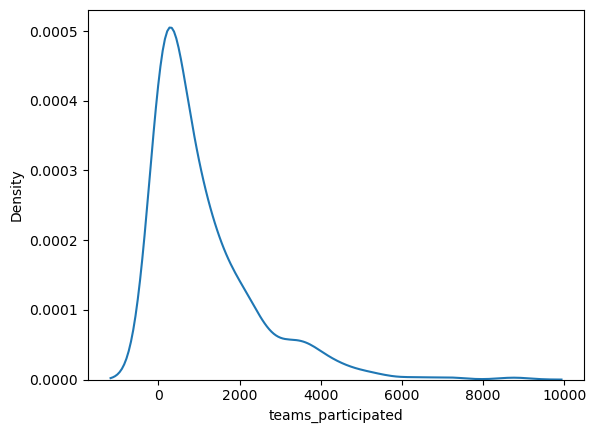

In [64]:
sns.kdeplot(competitions_meta, x="teams_participated")

In [ ]:
# Bootrstrapping method

questions to answer?
How accurate are the deadline estimates for the competitions? Is there a relationship between the reward offered and the accuracy of the deadline estimate?
Are there any common themes or keywords in the titles and descriptions of the competitions? What insights can be gained from text analysis of this data?
Are there any interesting patterns or relationships between the different columns of the data? Are there any columns that are highly correlated with each other?
Are there any trends or patterns over time in the dataset?
What are the main challenges or limitations in the dataset and how they were handled?
What are the main insights from the data and what are the potential implications for future competitions or research in the field?